<font color=blue>
Supriya Raman<br>
Investment Analysis Assignment <br>
21st October, 2019
    </font>

## Checkpoint 1: Data Cleaning 1
Loading the companies and rounds data into two data frames and naming them as companies and rounds2 respectively.

#### Loading rounds2.csv into dataframe named "rounds2"

In [1]:
#import libraries
import pandas as pd
import numpy as np

#Read the data from csv file using encoding
df_rounds2 = pd.read_csv("C:\\NotBackedUp\\Upgrad\\Investment Analysis Assignment\\rounds2.csv",encoding = "palmos")
df_rounds2["company_permalink"] = df_rounds2["company_permalink"].str.lower()

#Renaming the field to have matching name for merging with companies
df_rounds2.rename(columns={'company_permalink':'permalink'}, inplace=True)

df_rounds2.head(5)

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [2]:
df_rounds2.info()

## Finding total number of unique companies in "rounds2"
len(df_rounds2["permalink"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
permalink                  114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


66368

#### Loading companies.txt into dataframe named "companies"

In [3]:
#Read the data from text file using encoding and separator as Tab
df_companies = pd.read_csv("C:\\NotBackedUp\\Upgrad\\Investment Analysis Assignment\\companies.txt",encoding = "palmos", sep="\t")
df_companies["permalink"] = df_companies["permalink"].str.lower()
df_companies.head(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
8,/organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
9,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,operating,CHL,12,Santiago,Las Condes,01-01-2012


In [4]:
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


#### Finding Unique key in companies dataframe 

In [5]:
## Total number of non null values = Total number of unique values in "companies"
len(df_companies["permalink"].unique())

66368

#### Merging the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. The merged dataset frame is named as "master_frame".

In [6]:
# Merging two dataset to form master_frame
master_frame=pd.merge(df_rounds2,df_companies,how='inner', on='permalink')
master_frame.head(10)

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [7]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
permalink                  114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(14)
memory usage: 14.0+ MB


#### Find companies in the rounds2 file which are not  present in companies

In [8]:
## Find companies in the rounds2 file which are not  present in companies
temp = df_rounds2[(~df_rounds2.permalink.isin(master_frame.permalink))]
print(temp.head(10))

Empty DataFrame
Columns: [permalink, funding_round_permalink, funding_round_type, funding_round_code, funded_at, raised_amount_usd]
Index: []


## Checkpoint 2: Funding Type Analysis
Spark Funds wants to choose one of these four investment types for each potential investment they will make. Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity). Based on the most representative investment amount calculated above, decide the investment type which would be most suitable for Spark Funds?

In [9]:
# Finding mean of each funding type, ignoring the null values (function will auto ignore nulls)
grp = master_frame.groupby('funding_round_type').mean()
print(grp)

                       raised_amount_usd
funding_round_type                      
angel                       9.586945e+05
convertible_note            1.453439e+06
debt_financing              1.704353e+07
equity_crowdfunding         5.383682e+05
grant                       4.300576e+06
non_equity_assistance       4.112031e+05
post_ipo_debt               1.687046e+08
post_ipo_equity             8.218249e+07
private_equity              7.330859e+07
product_crowdfunding        1.363131e+06
secondary_market            7.964963e+07
seed                        7.198180e+05
undisclosed                 1.924237e+07
venture                     1.174895e+07


In [ ]:
# Finding avearge of each funding type
avg1 = master_frame.groupby('funding_round_type').get_group('venture').mean()
print(grp)
avg2 = master_frame.groupby('funding_round_type').get_group('angel').mean()
print(grp)
avg3 = master_frame.groupby('funding_round_type').get_group('seed').mean()
print(grp)
avg4 = master_frame.groupby('funding_round_type').get_group('private equity').mean()
print(grp)

## Checkpoint 3: Country Analysis
Make a data frame named "top9" with the top nine countries (based on the total investment amount each country has received)
<br>Analysing the data find the Top 3 English-Speaking Countries

#### Analysing the data 

In [10]:
# Count null country_code in comapnies
print("Null country code in companies = " , df_companies["country_code"].isnull().sum())

# Count null country_code in master_frame
print("Null country code in master_frame = " , master_frame["country_code"].isnull().sum())

# Count null country_code in master_frame with funding type as venture
a = master_frame[(master_frame['country_code'].notnull()) & (master_frame['funding_round_type'] == "venture")]
print("Venture = " , len(a))

# Count not null country_code rows in master_frame
print("Not Null country code in companies = " , master_frame["country_code"].notnull().sum())

# Number of distinct countries
print(master_frame["country_code"].unique())

# Analysing data to check if missing country code can be filled using its state_code or city
temp = master_frame[(master_frame['country_code'].isnull()) & (master_frame['state_code'].isnull() == False) & (master_frame['city'].isnull() == False)]
print(temp.head(10))
# Empty Dataframe signifies rows with null country code also have null state code and city and it cant be filled.

Null country code in companies =  6958
Null country code in master_frame =  8678
Venture =  52619
Not Null country code in companies =  106271
['IND' 'USA' nan 'CHN' 'HKG' 'CAN' 'CHL' 'GBR' 'FRA' 'AUS' 'DNK' 'ROM'
 'AUT' 'KOR' 'NLD' 'SWE' 'JPN' 'RUS' 'SGP' 'NOR' 'COL' 'ESP' 'BEL' 'IRL'
 'ITA' 'ISR' 'NZL' 'CZE' 'DEU' 'CHE' 'BRA' 'BGR' 'SVN' 'JOR' 'HUN' 'BWA'
 'NGA' 'FIN' 'TUR' 'IDN' 'ARE' 'CYP' 'POL' 'CRI' 'PRT' 'ARG' 'TWN' 'KHM'
 'THA' 'SVK' 'UKR' 'LTU' 'ISL' 'ZAF' 'MEX' 'VEN' 'URY' 'MUS' 'KEN' 'PHL'
 'MNE' 'VNM' 'GHA' 'PSE' 'MYS' 'PER' 'EGY' 'PAN' 'LVA' 'GGY' 'ALB' 'UGA'
 'HRV' 'EST' 'LBN' 'GRC' 'PAK' 'NPL' 'LUX' 'SAU' 'IRN' 'GTM' 'BAH' 'ARM'
 'BGD' 'MDA' 'SRB' 'TUN' 'ZWE' 'BRB' 'NIC' 'TAN' 'PRI' 'TTO' 'BHR' 'CMR'
 'BLR' 'CYM' 'BRN' 'ECU' 'SLV' 'MLT' 'ZMB' 'MKD' 'GIB' 'TGO' 'LAO' 'BMU'
 'HND' 'MCO' 'MMR' 'KAZ' 'QAT' 'DOM' 'MAR' 'LIE' 'GEO' 'MOZ' 'DZA' 'JAM'
 'KNA' 'AZE' 'SEN' 'RWA' 'DMA' 'UZB' 'BLZ' 'OMN' 'JEY' 'KWT' 'CIV' 'BLM'
 'GRD' 'LKA' 'SOM' 'SYC' 'PRY' 'MAF']
Empty DataFrame
Co

#### Deleting rows with country_code as missing values. Filtering rows with funding type as venture. Extracting the required columns. 

In [11]:
# Missing country code cant be filled using existing data as state code and City as these values are also null for such rows
# Extracting rows where 
#    -  country code is not null 
#    -  Raised amount USD (Investment amount) is not null
#    -  Funding type is venture
#    -  Also extracting required columns from dataframe 
df_extract = pd.DataFrame(master_frame[(master_frame['country_code'].notnull()) & 
                                 (master_frame['raised_amount_usd'].notnull()) &
                                 (master_frame['funding_round_type'] == "venture")], 
                         columns=["funding_round_type","raised_amount_usd","country_code"])
print(len(df_extract))
df_extract.head(10)

#Analysisng data
#a = df_extract[(df_extract['country_code'] == "USA")]
#a.head(100)

48111


,funding_round_type,raised_amount_usd,country_code
0,venture,10000000.0,IND
4,venture,2000000.0,CHN
8,venture,719491.0,CAN
10,venture,20000000.0,USA
11,venture,1700000.0,USA
12,venture,8900000.0,USA
22,venture,5000000.0,USA
28,venture,4000000.0,GBR
34,venture,2520000.0,USA
38,venture,265940.0,USA


In [12]:
#Creating top9 dataframe with sum of funding amount grouped by Country code
top9 = df_extract.groupby('country_code').sum()
top9.sort_values("raised_amount_usd", axis = 0, ascending = False, inplace = True)
top9.head(9)

,raised_amount_usd
country_code,
USA,4.225108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09
FRA,7.259537e+09
ISR,6.907515e+09
DEU,6.346960e+09
JPN,3.363677e+09


## Checkpoint 4: Sector Analysis 1
Extracting the primary sector of each category list from the category_list column using the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note:‘Others’ is also considered one of the main sectors)<br>
Creating a merged data frame with each primary sector mapped to its main sector (the primary sector should be present in a separate column).

#### Extract the primary sector of each category list

In [13]:
# Adding primary sector column to master_frame
# This is derived as first string before the vertical bar in category_list column 
master_frame["primary sector"] = master_frame["category_list"].str.split('|').str[0]
master_frame.head(10)

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,Software
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,Games
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics


In [14]:
#Read the data from csv file using encoding
df_mapping = pd.read_csv("C:\\NotBackedUp\\Upgrad\\Investment Analysis Assignment\\mapping.csv",encoding = "palmos")
df_mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [15]:
df_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.8+ KB


#### Cleaning data in mapping dataframe

In [16]:
# Category list column in mapping.csv is found with several spelling mistakes where substring of text 'na' is replaced with '0'
# Correcting the spelling in mapping DataFrame to replace 0 with substring text as 'na'
df_mapping["category_list"]= df_mapping['category_list'].str.replace("0", "na")
df_mapping["category_list"].head(50)

0                                    NaN
1                                     3D
2                            3D Printing
3                          3D Technology
4                             Accounting
5                       Active Lifestyle
6                           Ad Targeting
7                     Advanced Materials
8                       Adventure Travel
9                            Advertising
10                 Advertising Exchanges
11                  Advertising Networks
12                 Advertising Platforms
13                                Advice
14                             Aerospace
15                           Agriculture
16                 Air Pollution Control
17                            Algorithms
18                           All Markets
19                          All Students
20                  Alternative Medicine
21                                Alumni
22                             Analytics
23                               Android
24              

#### Extract the main sector of each category list

In [18]:
# Reversing One Hot Encoding in mapping file
df_mapping['main sector'] = pd.get_dummies(df_mapping).idxmax(1)

# Fetch list of categoty list and corresponding main sector only. 
df_mapping_list = df_mapping[["category_list", "main sector"]]

#Rename the field category_list to primary sector to enable join with master_frame
df_mapping_list.rename(columns={'category_list':'primary sector'}, inplace=True)

#Drop the first blabk row
df_mapping_list.drop(df_mapping_list.index[0], inplace=True)

df_mapping_list.head(50)

,primary sector,main sector
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"
5,Active Lifestyle,Health
6,Ad Targeting,"Social, Finance, Analytics, Advertising"
7,Advanced Materials,Manufacturing
8,Adventure Travel,Automotive & Sports
9,Advertising,"Social, Finance, Analytics, Advertising"
10,Advertising Exchanges,"Social, Finance, Analytics, Advertising"


In [19]:
df_mapping_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 1 to 687
Data columns (total 2 columns):
primary sector    687 non-null object
main sector       687 non-null object
dtypes: object(2)
memory usage: 16.1+ KB


#### Create the final list having all columns of master_frame along with two new fields - country_code and state_code

In [20]:
final_list = pd.merge(master_frame, df_mapping_list, on='primary sector', how="left")
final_list.head(50)

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary sector,main sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms,"News, Search and Messaging"
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms,"News, Search and Messaging"
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps,"News, Search and Messaging"
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web,"News, Search and Messaging"
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,Software,Others
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,Games,Entertainment
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology,Cleantech / Semiconductors
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology,Cleantech / Semiconductors
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics,"Social, Finance, Analytics, Advertising"


In [21]:
final_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 17 columns):
permalink                  114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
primary sector             111539 non-null object
main sector                111146 non-null object
dtypes: float64(1), object(16)
memory usa

## Checkpoint 5: Sector Analysis 2
Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of selected funding type falling within the 5-15 million USD range. The three data frames should contain:
- All the columns of the master_frame along with the primary sector and the main sector
- The total number (or count) of investments for each main sector in a separate column
- The total amount invested in each main sector in a separate column

#### Create three dataframe one each for top three English speaking countries obtained in Checkpoint 4
-  D1 for Country 1 (USA) 
-  D2 for Country 2 (GBR)
-  D3 for Country 3 (IND)

In [22]:
# Filter data
df_D1 = final_list[(final_list['country_code'] == "USA") & 
                (final_list['funding_round_type'] == "venture") &
                (final_list['raised_amount_usd']>= 5000000) & 
                (final_list['raised_amount_usd']<= 15000000)]

#Calculate sum and count of investment grouped by main sectors
temp = pd.DataFrame(df_D1.groupby('main sector')['raised_amount_usd'].agg(['sum','count']))
#temp.head(10)

#Merge sum and count of investment in dataframe - Creating Dataframe for Country1
D1 = pd.merge(df_D1, temp, on='main sector', how="left")
D1.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary sector,main sector,sum,count
0,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics,"Social, Finance, Analytics, Advertising",2.380738e+10,2714.0
1,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,Apps,"News, Search and Messaging",1.395957e+10,1582.0
2,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,Service Providers,Others,2.632101e+10,2950.0
3,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.0,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,Manufacturing,Manufacturing,7.258553e+09,799.0
4,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,5000000.0,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,Manufacturing,Manufacturing,7.258553e+09,799.0


In [23]:
# Filter data
df_D2 = final_list[(final_list['country_code'] == "GBR") & 
                   (final_list['funding_round_type'] == "venture") &
                   (final_list['raised_amount_usd']>= 5000000) & 
                   (final_list['raised_amount_usd']<= 15000000)]

#Calculate sum and count of investment grouped by main sectors
temp = pd.DataFrame(df_D2.groupby('main sector')['raised_amount_usd'].agg(['sum','count']))
#temp.head(10)

#Merge sum and count of investment in dataframe - Creating Dataframe for Country1
D2 = pd.merge(df_D2, temp, on='main sector', how="left")
D2.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary sector,main sector,sum,count
0,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,B,29-09-2014,5500000.0,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,01-01-2008,Android,"Social, Finance, Analytics, Advertising",1.089404e+09,133.0
1,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,A,01-01-2008,8468328.0,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,Content Creators,Entertainment,4.827847e+08,56.0
2,/organization/7digital,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,NaN,19-10-2012,10000000.0,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,Content Creators,Entertainment,4.827847e+08,56.0
3,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,4.827847e+08,56.0
4,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,4.827847e+08,56.0


In [24]:
# Filter data
df_D3 = final_list[(final_list['country_code'] == "IND") & 
                   (final_list['funding_round_type'] == "venture") &
                   (final_list['raised_amount_usd']>= 5000000) & 
                   (final_list['raised_amount_usd']<= 15000000)]
#df_D3.info()

#Calculate sum and count of investment grouped by main sectors
temp = pd.DataFrame(df_D3.groupby('main sector')['raised_amount_usd'].agg(['sum','count']))
#temp.head(10)

#Merge sum and count of investment in dataframe - Creating Dataframe for Country1
D3 = pd.merge(df_D3, temp, on='main sector', how="left")
D3.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary sector,main sector,sum,count
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment,2.808300e+08,33.0
1,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.0,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,E-Commerce,Others,1.013410e+09,110.0
2,/organization/a-little-world,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,B,09-09-2008,6410000.0,A LITTLE WORLD,http://alittleworld.com,Finance,operating,IND,16,Mumbai,Mumbai,02-03-2000,Finance,"Social, Finance, Analytics, Advertising",5.505496e+08,60.0
3,/organization/adlabs-imagica,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,NaN,28-10-2014,8180000.0,Adlabs Imagica,http://www.adlabsimagica.com,Entertainment|Tourism,operating,IND,16,IND - Other,Khopoli,NaN,Entertainment,Entertainment,2.808300e+08,33.0
4,/organization/agile,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,A,01-05-2011,5740000.0,Agile,http://www.agile-ft.com,Finance|Finance Technology|FinTech|Insurance,operating,IND,16,Mumbai,Mumbai,NaN,Finance,"Social, Finance, Analytics, Advertising",5.505496e+08,60.0


In [25]:
## Sl No. 1 ---   Finding total number of Investments (count)
print(D1.info())
print(D2.info())
print(D3.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12150 entries, 0 to 12149
Data columns (total 19 columns):
permalink                  12150 non-null object
funding_round_permalink    12150 non-null object
funding_round_type         12150 non-null object
funding_round_code         8671 non-null object
funded_at                  12150 non-null object
raised_amount_usd          12150 non-null float64
name                       12150 non-null object
homepage_url               11558 non-null object
category_list              12064 non-null object
status                     12150 non-null object
country_code               12150 non-null object
state_code                 12148 non-null object
region                     12141 non-null object
city                       12141 non-null object
founded_at                 10415 non-null object
primary sector             12064 non-null object
main sector                12012 non-null object
sum                        12012 non-null float64
count   

In [26]:
## Sl No. 2 ---   Finding Total amount of investment (USD)
print(D1['raised_amount_usd'].sum())
print(D2['raised_amount_usd'].sum())
print(D3['raised_amount_usd'].sum())

108531347515.0
5436843539.0
2976543602.0


In [27]:
## For Country1
## Sl No. 3 ---   Top sector (based on count of investments)
## Sl No. 4 ---   Second-best sector (based on count of investments)
## Sl No. 5 ---   Third-best sector (based on count of investments)
## Sl No. 6 ---   Number of investments in top sector (3)
## Sl No. 7 ---   Number of investments in second sector (4)
## Sl No. 8 ---   Number of investments in third sector (5)

df_Country1_Summary = (pd.DataFrame(df_D1.groupby('main sector')['raised_amount_usd'].agg(['sum','count'])))
df_Country1_Summary.sort_values('count', axis = 0, ascending = False, inplace = True)
df_Country1_Summary.head(10)

,sum,count
main sector,,
Others,2.632101e+10,2950
"Social, Finance, Analytics, Advertising",2.380738e+10,2714
Cleantech / Semiconductors,2.120663e+10,2300
"News, Search and Messaging",1.395957e+10,1582
Health,8.211859e+09,909
Manufacturing,7.258553e+09,799
Entertainment,5.099198e+09,591
Automotive & Sports,1.454104e+09,167


In [28]:
## For Country2
## Sl No. 3 ---   Top sector (based on count of investments)
## Sl No. 4 ---   Second-best sector (based on count of investments)
## Sl No. 5 ---   Third-best sector (based on count of investments)
## Sl No. 6 ---   Number of investments in top sector (3)
## Sl No. 7 ---   Number of investments in second sector (4)
## Sl No. 8 ---   Number of investments in third sector (5)

df_Country2_Summary = (pd.DataFrame(df_D2.groupby('main sector')['raised_amount_usd'].agg(['sum','count'])))
df_Country2_Summary.sort_values('count', axis = 0, ascending = False, inplace = True)
df_Country2_Summary.head(10)

,sum,count
main sector,,
Others,1.283624e+09,147
"Social, Finance, Analytics, Advertising",1.089404e+09,133
Cleantech / Semiconductors,1.150140e+09,128
"News, Search and Messaging",6.157462e+08,73
Entertainment,4.827847e+08,56
Manufacturing,3.619403e+08,42
Health,2.145375e+08,24
Automotive & Sports,1.670516e+08,16


In [29]:
## For Country3
## Sl No. 3 ---   Top sector (based on count of investments)
## Sl No. 4 ---   Second-best sector (based on count of investments)
## Sl No. 5 ---   Third-best sector (based on count of investments)
## Sl No. 6 ---   Number of investments in top sector (3)
## Sl No. 7 ---   Number of investments in second sector (4)
## Sl No. 8 ---   Number of investments in third sector (5)

df_Country3_Summary = (pd.DataFrame(df_D3.groupby('main sector')['raised_amount_usd'].agg(['sum','count'])))
df_Country3_Summary.sort_values('count', axis = 0, ascending = False, inplace = True)
df_Country3_Summary.head(10)

,sum,count
main sector,,
Others,1.013410e+09,110
"Social, Finance, Analytics, Advertising",5.505496e+08,60
"News, Search and Messaging",4.338345e+08,52
Entertainment,2.808300e+08,33
Manufacturing,2.009000e+08,21
Cleantech / Semiconductors,1.653800e+08,20
Health,1.677400e+08,19
Automotive & Sports,1.369000e+08,13


In [30]:
### Sl No. 9 (Country 1) --- For point 3 (top sector count-wise), which company received the highest investment?

### Filtering for the top sector and Group them by companies name and aggregrate the total investment
temp = D1.loc[D1["main sector"]== "Others"].groupby('name').sum()

### Sort the dataframe in descending order
temp.sort_values('raised_amount_usd', axis = 0, ascending = False, inplace = True)

temp.head()

,raised_amount_usd,sum,count
name,,,
Virtustream,64300000.0,1.579260e+11,17700.0
Capella Photonics,54968051.0,1.579260e+11,17700.0
AirTight Networks,54201907.0,1.316050e+11,14750.0
deCarta,52100000.0,1.316050e+11,14750.0
Black Duck Software,51000000.0,1.579260e+11,17700.0


In [31]:
### Sl No. 9 (Country 2) --- For point 3 (top sector count-wise), which company received the highest investment?

### Filtering for the top sector and Group them by companies name and aggregrate the total investment
temp = D2.loc[D2["main sector"]== "Others"].groupby('name').sum()

### Sort the dataframe in descending order
temp.sort_values('raised_amount_usd', axis = 0, ascending = False, inplace = True)

temp.head()

,raised_amount_usd,sum,count
name,,,
Electric Cloud,37000000.0,5.134497e+09,588.0
SenSage,36250000.0,5.134497e+09,588.0
Enigmatec,32500000.0,3.850873e+09,441.0
SilverRail Technologies,29000000.0,3.850873e+09,441.0
OpenCloud,27972766.0,3.850873e+09,441.0


In [32]:
### Sl No. 9 (Country 3) --- For point 3 (top sector count-wise), which company received the highest investment?

### Filtering for the top sector and Group them by companies name and aggregrate the total investment
temp = D3.loc[D3["main sector"]== "Others"].groupby('name').sum()

### Sort the dataframe in descending order
temp.sort_values('raised_amount_usd', axis = 0, ascending = False, inplace = True)

temp.head()

,raised_amount_usd,sum,count
name,,,
FirstCry.com,39000000.0,3.040229e+09,330.0
Myntra,38000000.0,4.053638e+09,440.0
CommonFloor,32900000.0,3.040229e+09,330.0
Pepperfry.com,28000000.0,3.040229e+09,330.0
ItzCash Card Ltd.,25000000.0,2.026819e+09,220.0


In [33]:
### Sl No. 10 (Country 1) --- For point 4 (second best sector count-wise), which company received the highest investment?

### Filtering for the second top sector and Group them by companies name and aggregrate the total investment
temp = D1.loc[D1["main sector"]== "Social, Finance, Analytics, Advertising"].groupby('name').sum()

### Sort the dataframe in descending order
temp.sort_values('raised_amount_usd', axis = 0, ascending = False, inplace = True)

temp.head()

,raised_amount_usd,sum,count
name,,,
SST Inc. (Formerly ShotSpotter),67933006.0,1.666516e+11,18998.0
Demandbase,63000000.0,1.190369e+11,13570.0
Intacct,61800000.0,1.190369e+11,13570.0
NetBase Solutions,60600000.0,1.666516e+11,18998.0
Lotame,59700000.0,1.190369e+11,13570.0


In [34]:
### Sl No. 10 (Country 2) --- For point 4 (second best sector count-wise), which company received the highest investment?

### Filtering for the second top sector and Group them by companies name and aggregrate the total investment
temp = D2.loc[D2["main sector"]== "Social, Finance, Analytics, Advertising"].groupby('name').sum()

### Sort the dataframe in descending order
temp.sort_values('raised_amount_usd', axis = 0, ascending = False, inplace = True)

temp.head()

,raised_amount_usd,sum,count
name,,,
Celltick Technologies,37500000.0,4.357616e+09,532.0
myThings,34000000.0,4.357616e+09,532.0
Zopa,32900000.0,3.268212e+09,399.0
VisualDNA,28550000.0,3.268212e+09,399.0
MarketInvoice,25553007.0,3.268212e+09,399.0


In [35]:
### Sl No. 10 (Country 3) --- For point 4 (second best sector count-wise), which company received the highest investment?

### Filtering for the second top sector and Group them by companies name and aggregrate the total investment
temp = D3.loc[D3["main sector"]== "Social, Finance, Analytics, Advertising"].groupby('name').sum()

### Sort the dataframe in descending order
temp.sort_values('raised_amount_usd', axis = 0, ascending = False, inplace = True)

temp.head()

,raised_amount_usd,sum,count
name,,,
Manthan Systems,50700000.0,2.202198e+09,240.0
Komli Media,28000000.0,1.651649e+09,180.0
ShopClues.com,25000000.0,1.101099e+09,120.0
inTarvo,21900000.0,1.101099e+09,120.0
Grameen Financial Services,21556050.0,1.101099e+09,120.0


## Checkpoint 6: Plots
1. A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

#### Importing libraries to plot the graph

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
# set a seaborn style 
sns.set_style("darkgrid")

#### Plot 1 - Percentage / Fraction of Total Investments for all Sectors

In [38]:
# Preparing the data for Plot 1

# Master_frame grouped by funding type and then sorted by investment amount
grp = master_frame.groupby('funding_round_type').mean()

# Convert figure in millions
grp["raised_amount_usd"] = grp["raised_amount_usd"]/ 1000000
grp.sort_values("raised_amount_usd", axis = 0, ascending = False, inplace = True)
grp.head(20)

,raised_amount_usd
funding_round_type,
post_ipo_debt,168.704572
post_ipo_equity,82.182494
secondary_market,79.649630
private_equity,73.308593
undisclosed,19.242370
debt_financing,17.043526
venture,11.748949
grant,4.300576
convertible_note,1.453439


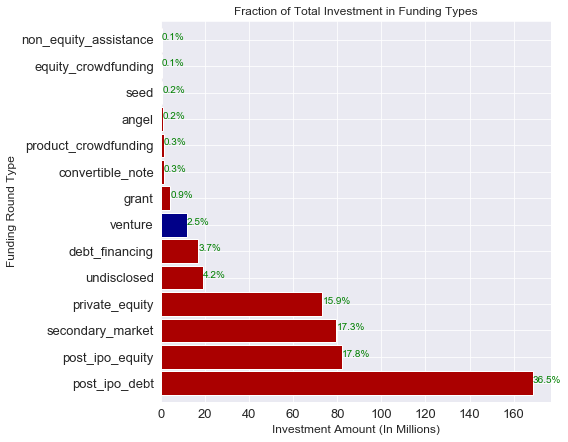

In [39]:
# Plotting the horizontal bar graph for Plot 1
# Conditional coloring is applied for all investment in range 5 million to 15 million (both inclusive)
ax = grp['raised_amount_usd'].plot(kind='barh', figsize=(7,7), fontsize=13, width = 0.9, 
                                   color=['#AA0000' if (row.raised_amount_usd >= 15 or row.raised_amount_usd <= 5) else '#000088' for name,row in grp.iterrows()])

# Setting the captions on Bar graph
ax.set_title("Fraction of Total Investment in Funding Types", fontsize=12)
ax.set_xlabel("Investment Amount (In Millions)", fontsize=12);
ax.set_ylabel("Funding Round Type", fontsize=12);


# Displaying the percentage of investment against each venture. Percentage is calculated globally.
total = grp['raised_amount_usd'].sum()
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02 
        y = p.get_y() + p.get_height()/2
#        ax.annotate(percentage, (x, y))
        ax.text(x, y, percentage, fontsize=10, color='green')

#### Plot 2 - Total Investments for top 9 countries

In [40]:
# Preparing the data for Plot 2

#top9 dataframe with sum of investment amount grouped by Country code
top9 = df_extract.groupby('country_code').sum()
top9["raised_amount_usd"] = top9["raised_amount_usd"]/ 1000000

# Sort the dataframe with investment amount in descending order
top9.sort_values("raised_amount_usd", axis = 0, ascending = False, inplace = True)

#Extract top9 countries - based on the total investment amount each country has received
top9 = top9.head(9)
top9.head(10)

,raised_amount_usd
country_code,
USA,422510.842796
CHN,39835.418773
GBR,20245.627416
IND,14391.858718
CAN,9583.332317
FRA,7259.536732
ISR,6907.514579
DEU,6346.959822
JPN,3363.676611


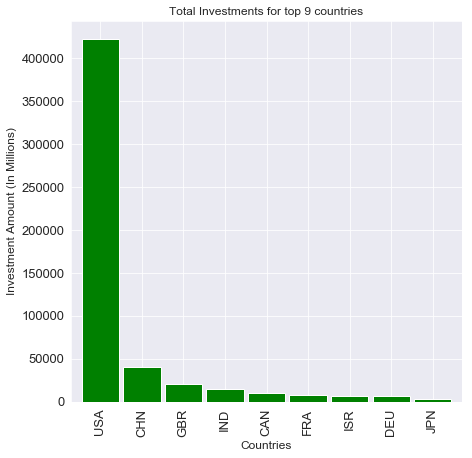

In [41]:
# Plotting the bar graph for Plot 2
ay = top9['raised_amount_usd'].plot(kind='bar', figsize=(7,7), fontsize=13, width = 0.9, 
                                   color='green')

# Setting the captions on Bar graph
ay.set_title("Total Investments for top 9 countries", fontsize=12)
ay.set_ylabel("Investment Amount (In Millions)", fontsize=12);
ay.set_xlabel("Countries", fontsize=12);

#### Plot 3 - Number of investments in the top 3 sectors of the top 3 countries

In [42]:
# data for plotting Plot 3 

# The dataframe used to plot Plot3 graphs are present above in 
# - df_Country1_Summary, 
# - df_Country2_Summary and 
# - df_Country3_Summary
#df_Country1_Summary = (pd.DataFrame(df_D1.groupby('main sector')['raised_amount_usd'].agg(['sum','count'])))
#df_Country1_Summary.sort_values('count', axis = 0, ascending = False, inplace = True)
#df_Country1_Summary.head(10)

Text(0.5, 0.98, 'Funding Type = Venture')

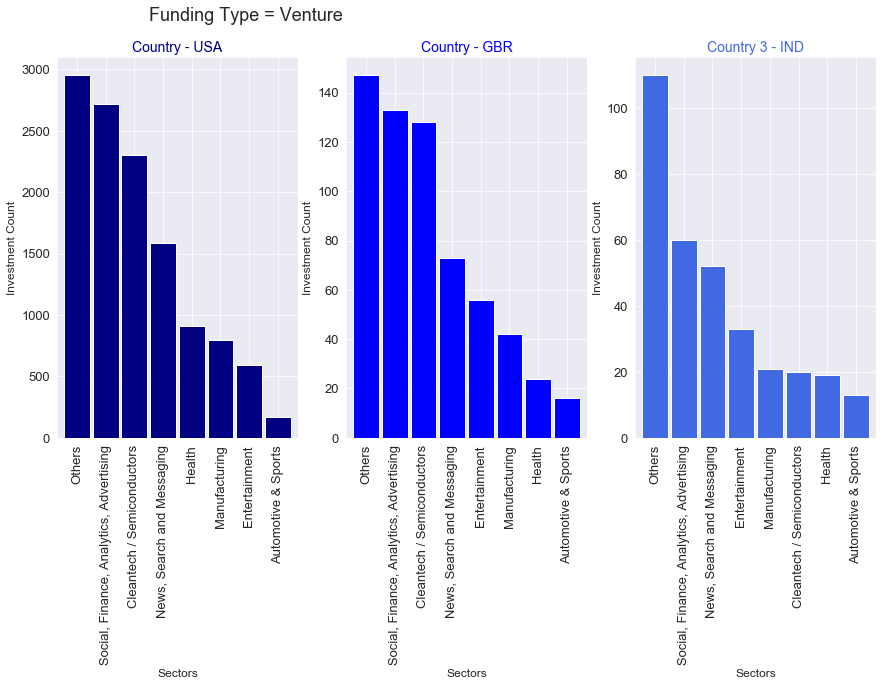

In [43]:
### Defining three subplots - one each for each country
fig = plt.figure()
plt.subplot(1, 3, 1)
plt.subplots_adjust(left=None, bottom=None, right=1.75, top=None, wspace=None, hspace=None)

###Subplot 1 - Country 1 - top investments sectorwise
az = df_Country1_Summary['count'].plot(kind='bar', figsize=(5,5), fontsize=13, width = 0.9, 
                                   color='navy')
# Setting the captions on Bar graph
az.set_title("Country - USA", fontsize=14, color='navy')
az.set_ylabel("Investment Count", fontsize=12);
az.set_xlabel("Sectors", fontsize=12);

###Subplot 2 - Country 2 - top investments sectorwise
plt.subplot(1, 3, 2)
az = df_Country2_Summary['count'].plot(kind='bar', figsize=(7,7), fontsize=13, width = 0.9, 
                                   color='blue')
# Setting the captions on Bar graph
az.set_title("Country - GBR", fontsize=14, color='blue')
az.set_ylabel("Investment Count", fontsize=12);
az.set_xlabel("Sectors", fontsize=12);

###Subplot 3 - Country 3 - top investments sectorwise
plt.subplot(1, 3, 3)
az = df_Country3_Summary['count'].plot(kind='bar', figsize=(7,7), fontsize=13, width = 0.9, 
                                   color='royalblue')
# Setting the captions on Bar graph
az.set_title("Country 3 - IND", fontsize=14, color='royalblue')
az.set_ylabel("Investment Count", fontsize=12);
az.set_xlabel("Sectors", fontsize=12);

fig.suptitle("Funding Type = Venture", fontsize=18)

#### Thank You